# Data Engineering
Project

Author: Anastasios Bekas

Date: 01/06/2024

Email: tasosmpekas786@gmail.com

# Preamble

In response to the unprecedented economic challenges brought about by the COVID-19 pandemic, the United States federal government established the Paycheck Protection Program (PPP) in 2020. This $1 trillion business loan program was designed to provide critical financial support to businesses and sole proprietors, enabling them to continue paying their employees and sustain operations during the pandemic-induced economic downturn.

As an analyst for a US government bureau, we have been tasked with creating a comprehensive report that examines the distribution and impact of PPP loans across the country. This report will provide an in-depth analysis of the financial aid provided to businesses, focusing on geographic level (state) and exploring the effects on different demographics and industries.

The purpose of this project is to offer valuable insights into the efficacy of the PPP in achieving its goals, identify any disparities in the distribution of funds, and assess the overall impact on the business landscape during the COVID-19 crisis. Through meticulous data analysis and integration of demographic and industry information, this report aims to inform policymakers and stakeholders, guiding future decisions on financial aid programs to ensure equitable and effective support for all segments of the business community.

# **Implementation**


Import all neccesary libraries

In [ ]:
#import the libraries
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Create directories to store data files, output files, code files and CSV files

In [ ]:
#Directory to store raw data files
os.makedirs("CovidRecovery/RawData", exist_ok=True)
#Directory to store output files
os.makedirs("CovidRecovery/output", exist_ok=True)
#Directory to store code files
os.makedirs("CovidRecovery/code", exist_ok=True)
#Directory to store CSV file
os.makedirs("CovidRecovey/CSV", exist_ok=True)

# **Load data**

We load all the PPP data from the US Small Business Administration website,  the job postings from the Opportunity Insights,and the latest population estimates of US Counties from US Cencus Bureau. All the data are publicly available and can be used without any permission.

In [ ]:
#URLs of PPP datasets
urls =[ 'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/738e639c-1fbf-4e16-beb0-a223831011e8/download/public_150k_plus_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/a7fa66f4-fd2e-433c-8ef9-59780ef60ae5/download/public_up_to_150k_1_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/7d2308a8-0ac1-48a8-b21b-f9eb373ac417/download/public_up_to_150k_2_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/5158aae1-066d-4d01-a226-e44ecc9bdda7/download/public_up_to_150k_3_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/d888bab1-da5b-46f2-bed2-a052d48af246/download/public_up_to_150k_4_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/ee12d751-2bb4-4343-8330-32311ae4e7c7/download/public_up_to_150k_5_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/27b874d9-a059-4296-bb74-374294c48616/download/public_up_to_150k_6_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/434efae0-016a-48da-92dc-c6f113d827c1/download/public_up_to_150k_7_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/4fc8e993-c3b9-4eb2-b9bb-dfbde9b1fb6f/download/public_up_to_150k_8_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/7f9c6867-2b55-472e-a4f3-fd0f5f27f790/download/public_up_to_150k_9_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/a8f2c8b2-facb-4e97-ad5f-7c8736c8b4b6/download/public_up_to_150k_10_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/6f9787a3-afd6-45b2-b78e-ad0dc097c1c3/download/public_up_to_150k_11_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/6f9787a3-afd6-45b2-b78e-ad0dc097c1c3/download/public_up_to_150k_11_230930.csv']

In [ ]:
# Loop through each URL, enumerate for indexing starting from 1
for i, url in enumerate(urls, start=1):
    # Create a filename for each dataset
    filename = f'ppp_dataset{i}.csv'
    # Define the file path where the dataset will be saved
    filepath = os.path.join('CovidRecovery', 'RawData', filename)

    # Make a GET request to the URL to download the dataset
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Open the file in write-binary mode and write the content
        with open(filepath, 'wb') as f:
            f.write(response.content)
        # Print success message
        print(f'Dataset {i} downloaded and saved successfully.')
    else:
        # Print error message if the download failed
        print(f'Failed to download dataset {i}. Status code: {response.status_code}')

path = 'CovidRecovery/RawData/data.csv'

Dataset 1 downloaded and saved successfully.
Dataset 2 downloaded and saved successfully.
Dataset 3 downloaded and saved successfully.
Dataset 4 downloaded and saved successfully.
Dataset 5 downloaded and saved successfully.
Dataset 6 downloaded and saved successfully.
Dataset 7 downloaded and saved successfully.
Dataset 8 downloaded and saved successfully.
Dataset 9 downloaded and saved successfully.
Dataset 10 downloaded and saved successfully.
Dataset 11 downloaded and saved successfully.
Dataset 12 downloaded and saved successfully.
Dataset 13 downloaded and saved successfully.


We keep only the necessary columns from the datasets for the purpose of our analysis, as not all columns are required.

In [ ]:
# Define the columns to keep
keep_columns = [
    'DateApproved','BorrowerState', 'BorrowerCity', 'InitialApprovalAmount','ServicingLenderState','JobsReported',
    'CurrentApprovalAmount','BusinessType', 'Race', 'Ethnicity', 'Gender', 'Veteran']

# Define the data types for each column
dtype_dict = {
    'DateApproved':'string',
    'BorrowerState': 'string',
    'BorroweCity' : 'string',
    'InitialApprovalAmount': 'float64',
    'CurrentApprovalAmount': 'float64',
    'ServicingLenderState': 'string',
    'JobsReported': 'float64',
    'BusinessType': 'string',
    'Race': 'string',
    'Ethnicity': 'string',
    'Gender': 'string',
    'Veteran': 'string',
}
# Load the dataset with specified data types
ppp_data = {}
for i in range (1,13):
  ppp_data[i] = pd.read_csv('CovidRecovery/RawData/'f'ppp_dataset{i}.csv', usecols=keep_columns, dtype=dtype_dict)
  ppp_data[i]['DateApproved'] = pd.to_datetime(ppp_data[i]['DateApproved'], format='%m/%d/%Y')

Due to memory constraints, we will extract a 10% sample from each dataset and combine these samples into a single dataset with 1176852 rows. If additional memory resources become available, we can perform a more comprehensive analysis.

In [ ]:
# List to store sampled DataFrames
sampled_dfs = []

# Load the datasets with specified data types and sample 10% from each
for i in range(1, 14):
    filepath = os.path.join('CovidRecovery', 'RawData', f'ppp_dataset{i}.csv')
    df = pd.read_csv(filepath, usecols=keep_columns, dtype=dtype_dict)
    df['DateApproved'] = pd.to_datetime(df['DateApproved'], format='%m/%d/%Y')
    sampled_dfs.append(df.sample(frac=0.1, random_state=42))

# Concatenate all sampled DataFrames into one
combined_df = pd.concat(sampled_dfs, ignore_index=True)

# Check if any datasets were loaded and print the first few rows of the combined DataFrame
if not combined_df.empty:
    print(combined_df.head())
else:
    print("No datasets were loaded.")

  DateApproved BorrowerCity BorrowerState  InitialApprovalAmount  \
0   2021-04-08     Milltown            WI              1003600.0   
1   2020-04-07  KANSAS CITY            MO               423985.0   
2   2020-04-10     PEWAUKEE            WI              3771000.0   
3   2021-02-06  Garden City            NY               195445.0   
4   2020-04-15     TARENTUM            PA               237300.0   

   CurrentApprovalAmount ServicingLenderState  JobsReported        Race  \
0              1003600.0                   MN          90.0       White   
1               423985.0                   NE          42.0  Unanswered   
2              3771000.0                   IL         232.0  Unanswered   
3               195445.0                   OH          11.0       White   
4               237300.0                   OH          22.0       White   

                Ethnicity              BusinessType        Gender      Veteran  
0  Not Hispanic or Latino               Corporation    Male

In [ ]:
len(combined_df)

1176852

Load job postings dataset from the Opportunity Insights

In [ ]:
# Define the URL
url = 'https://raw.githubusercontent.com/OpportunityInsights/EconomicTracker/main/data/Job%20Postings%20-%20State%20-%20Weekly.csv'

# Define the filename and filepath
filename = f'job.csv'
filepath = os.path.join('CovidRecovery', 'RawData', filename)

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(filepath, 'wb') as f:
        f.write(response.content)
    print(f'job  downloaded and saved successfully.')
else:
    print(f'Failed to download job. Status code: {response.status_code}')

job  downloaded and saved successfully.


In [ ]:
# Load the CSV file into a DataFrame
df_job = pd.read_csv(filepath).iloc[:, :4]
print(df_job.head())

   year  month  day_endofweek  statefips
0  2020      1             10          1
1  2020      1             10          2
2  2020      1             10          4
3  2020      1             10          5
4  2020      1             10          6


Load the the latest population dataset of US Counties from US Cencus Bureau.

In [ ]:
# Define the URL
url = 'https://www2.census.gov/programs-surveys/popest/datasets/2020-2023/counties/totals/co-est2023-alldata.csv'

# Define the filename and filepath
filename = f'Population_Estimates.csv'
filepath = os.path.join('CovidRecovery', 'RawData', filename)

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(filepath, 'wb') as f:
        f.write(response.content)
    print('Population Estimates downloaded and saved successfully.')
else:
    print(f'Failed to download Population Estimates. Status code: {response.status_code}')

Population Estimates downloaded and saved successfully.


In [ ]:
# Load the CSV file into a DataFrame with specified encoding
df_population = pd.read_csv(filepath, encoding='latin1')
print(df_population.head())

   SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME         CTYNAME  \
0      40       3         6      1       0  Alabama         Alabama   
1      50       3         6      1       1  Alabama  Autauga County   
2      50       3         6      1       3  Alabama  Baldwin County   
3      50       3         6      1       5  Alabama  Barbour County   
4      50       3         6      1       7  Alabama     Bibb County   

   ESTIMATESBASE2020  POPESTIMATE2020  POPESTIMATE2021  ...  RNATURALCHG2023  \
0            5024294          5031864          5050380  ...        -0.306805   
1              58809            58915            59203  ...         1.549122   
2             231768           233227           239439  ...        -0.435967   
3              25229            24969            24533  ...        -3.368165   
4              22301            22188            22359  ...        -2.280294   

   RINTERNATIONALMIG2021  RINTERNATIONALMIG2022  RINTERNATIONALMIG2023  \
0               0.

# **Clean Data**

We examine all datasets for missing values and remove any that are found.

In [ ]:
# Check for missing values in the entire DataFrame and print the count
combined_df.isna().sum()
# Remove rows with any missing values
combined_df = combined_df.dropna()
# Print the first few rows of the cleaned DataFrame
print("\nCleaned DataFrame:\n", combined_df.head())


Cleaned DataFrame:
   DateApproved BorrowerCity BorrowerState  InitialApprovalAmount  \
0   2021-04-08     Milltown            WI              1003600.0   
1   2020-04-07  KANSAS CITY            MO               423985.0   
2   2020-04-10     PEWAUKEE            WI              3771000.0   
3   2021-02-06  Garden City            NY               195445.0   
4   2020-04-15     TARENTUM            PA               237300.0   

   CurrentApprovalAmount ServicingLenderState  JobsReported        Race  \
0              1003600.0                   MN          90.0       White   
1               423985.0                   NE          42.0  Unanswered   
2              3771000.0                   IL         232.0  Unanswered   
3               195445.0                   OH          11.0       White   
4               237300.0                   OH          22.0       White   

                Ethnicity              BusinessType        Gender      Veteran  
0  Not Hispanic or Latino             

In [ ]:
# Replace empty strings with NaN
combined_df.replace("", pd.NA, inplace=True)
# Check if there are any NaN values in the entire DataFrame
combined_df.isna().any().any()

False

In [ ]:
# Check for missing values in the entire DataFrame and print the count
df_job.isna().sum()
#no missing values

year             0
month            0
day_endofweek    0
statefips        0
dtype: int64

In [ ]:
# Replace empty strings with NaN
df_job.replace("", pd.NA, inplace=True)
# Check if there are any NaN values in the entire DataFrame
df_job.isna().any().any()

False

In [ ]:
# Check for missing values in the entire DataFrame and print the count
df_population.isna().sum()
#no missing values

SUMLEV              0
REGION              0
DIVISION            0
STATE               0
COUNTY              0
                   ..
RDOMESTICMIG2022    0
RDOMESTICMIG2023    0
RNETMIG2021         0
RNETMIG2022         0
RNETMIG2023         0
Length: 67, dtype: int64

In [ ]:
# Replace empty strings with NaN
df_population.replace("", pd.NA, inplace=True)
# Check if there are any NaN values in the entire DataFrame
df_population.isna().any().any()

False

In [ ]:
# Make a copy
combined_df_2=combined_df.copy()

# **Explanatory Analysis**


By employing exploratory data analysis techniques, we seek to identify significant patterns and inequalities in aid distribution. This will enable decision-makers to make informed interventions and allocate resources efficiently.

In [ ]:
# Total number of current approval loans
total_loans = combined_df['CurrentApprovalAmount'].count()
print(f'Current Approval Amount: {total_loans}')

Current Approval Amount: 1176590


In [ ]:
# Summary statistics for the PPP dataset
print("Summary statistics for the PPP dataset:")
print(combined_df.describe())

# Summary statistics for the df_job dataset
print("\nSummary statistics for the df_job dataset:")
print(df_job.describe())

# Summary statistics for the df_population dataset
print("\nSummary statistics for the df_population dataset:")
print(df_population.describe())

Summary statistics for the PPP dataset:
                        DateApproved  InitialApprovalAmount  \
count                        1176590           1.176590e+06   
mean   2020-10-31 05:12:23.290356224           6.811094e+04   
min              2020-04-03 00:00:00          -1.996590e+05   
25%              2020-05-01 00:00:00           9.500000e+03   
50%              2021-01-29 00:00:00           2.062000e+04   
75%              2021-03-31 00:00:00           3.930000e+04   
max              2021-06-30 00:00:00           1.000000e+07   
std                              NaN           2.607871e+05   

       CurrentApprovalAmount  JobsReported  
count           1.176590e+06  1.176590e+06  
mean            6.774730e+04  7.673879e+00  
min             4.000000e-02  0.000000e+00  
25%             9.465000e+03  1.000000e+00  
50%             2.060650e+04  1.000000e+00  
75%             3.910520e+04  6.000000e+00  
max             1.000000e+07  5.000000e+02  
std             2.580834e+05  2.

<ipython-input-33-251e6a4c9127>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bars=sns.barplot(x='STNAME', y='POPESTIMATE2020', data=df_population, ci=None)


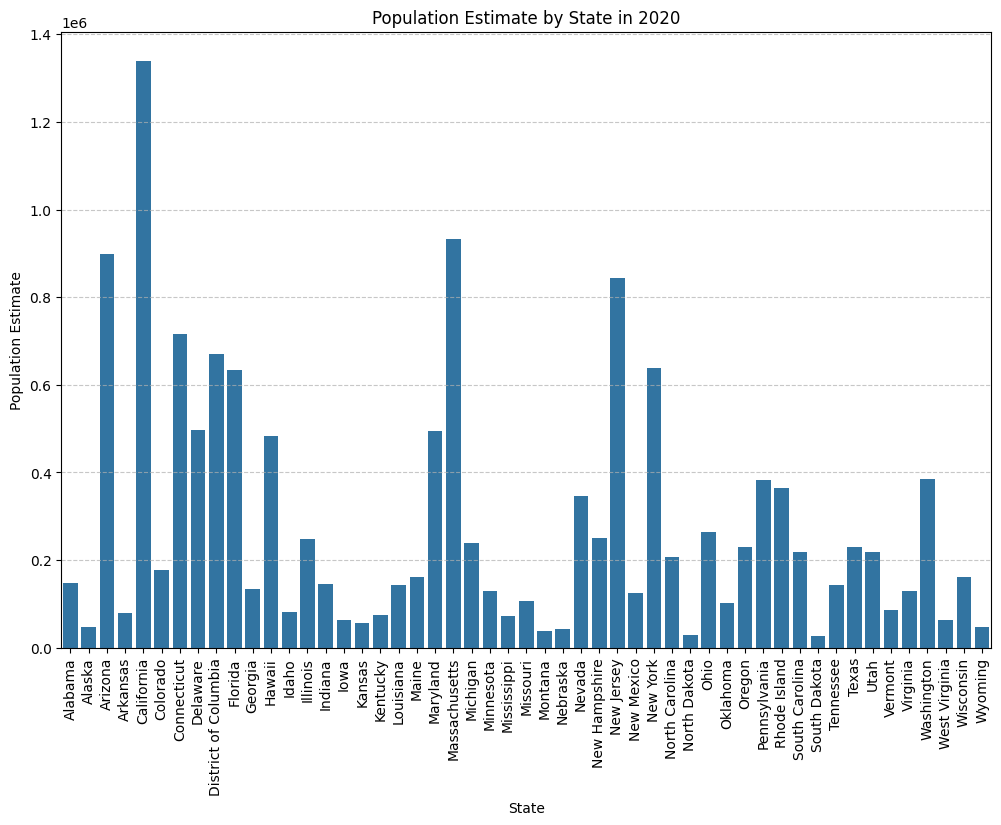

In [ ]:
# Choropleth map showing the distribution of loan amounts across states or counties
plt.figure(figsize=(12, 8))
bars=sns.barplot(x='STNAME', y='POPESTIMATE2020', data=df_population, ci=None)
plt.title('Population Estimate by State in 2020')
plt.xlabel('State')
plt.ylabel('Population Estimate')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart titled "Population Estimate by State in 2020" illustrates the population estimates for each U.S. state for the year 2020. Each bar signifies a state, with its height representing the population estimate in millions. The chart emphasizes notable population differences among the states, showing significantly higher estimates for states like California and Massachusetts, while states such as Nebraska and South Dakota have considerably lower estimates.

<ipython-input-34-570e85ff077c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_states_loan_counts.index, y=top_states_loan_counts.values, palette=colors)


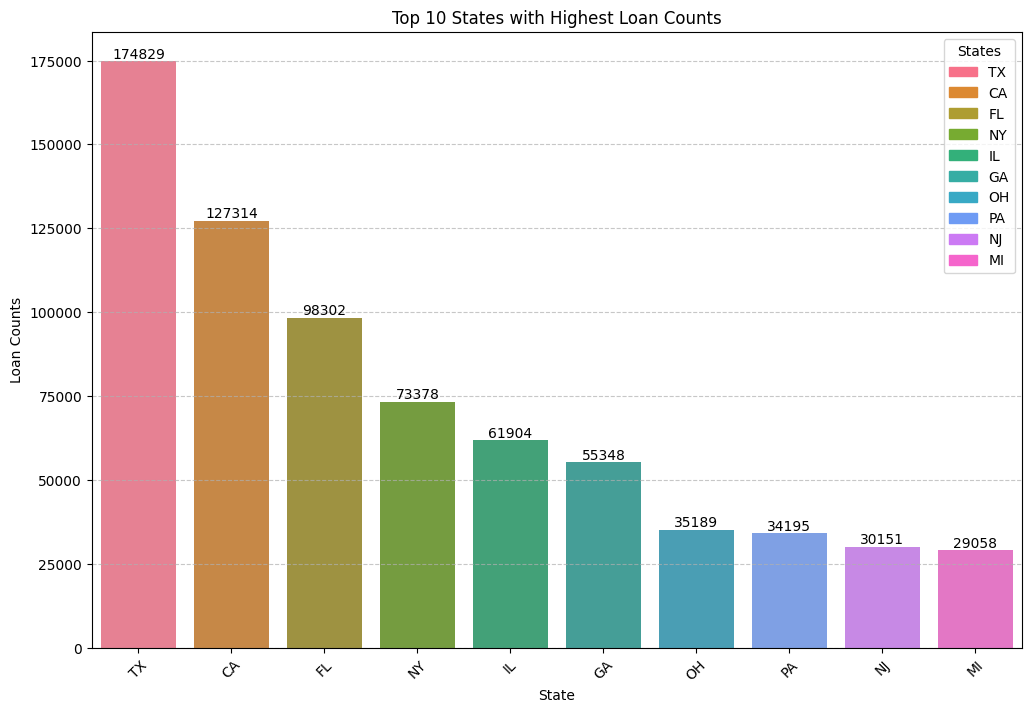

In [ ]:
# Group the DataFrame by 'BorrowerState' and count the number of loans in each state
state_loan_counts = combined_df['BorrowerState'].value_counts()

# Get the top 10 states with the highest loan counts
top_states_loan_counts = state_loan_counts.nlargest(10)

# Plotting
plt.figure(figsize=(12, 8))
colors = sns.color_palette("husl", len(top_states_loan_counts))
# Create bar plot with different colors for each bar
bars = sns.barplot(x=top_states_loan_counts.index, y=top_states_loan_counts.values, palette=colors)

# Add labels to each bar
for bar, label in zip(bars.patches, top_states_loan_counts.index):
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width() / 2., height, f'{int(height)}', ha='center', va='bottom')

# Create custom legend handles
from matplotlib.patches import Patch
legend_handles = [Patch(color=color, label=state) for color, state in zip(colors, top_states_loan_counts.index)]

# Add the legend to the plot
plt.legend(handles=legend_handles, title='States')

plt.title('Top 10 States with Highest Loan Counts')
plt.xlabel('State')
plt.ylabel('Loan Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart titled "Top 10 States with Highest Loan Counts" shows the number of loans distributed in the top 10 states. Texas (TX) leads with 174,829 loans, followed by California (CA) with 127,314 loans, and so on.

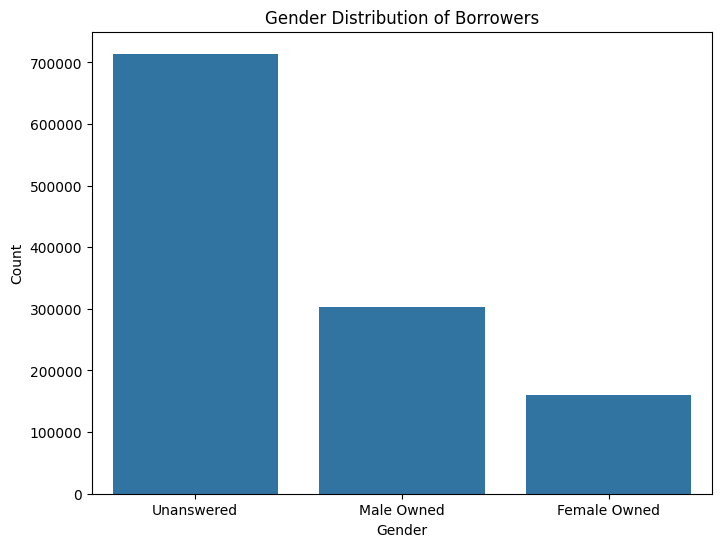

0.6069522943421243
0.2571337509242812
0.13591395473359455


In [ ]:
# Gender distribution
gender_distribution = combined_df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Gender Distribution of Borrowers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
gender_distribution
print(714134/(714134+302541+159915))
print(302541/(714134+302541+159915))
print(159915/(714134+302541+159915))

The bar chart titled "Gender Distribution of Borrowers" displays the gender of Borrowers. The 60.7% did not answer the question, the 25.7% were males and the 13.6% were females.

<ipython-input-41-f2264818ebf6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=industry_counts.index, y=industry_counts.values, palette=colors)


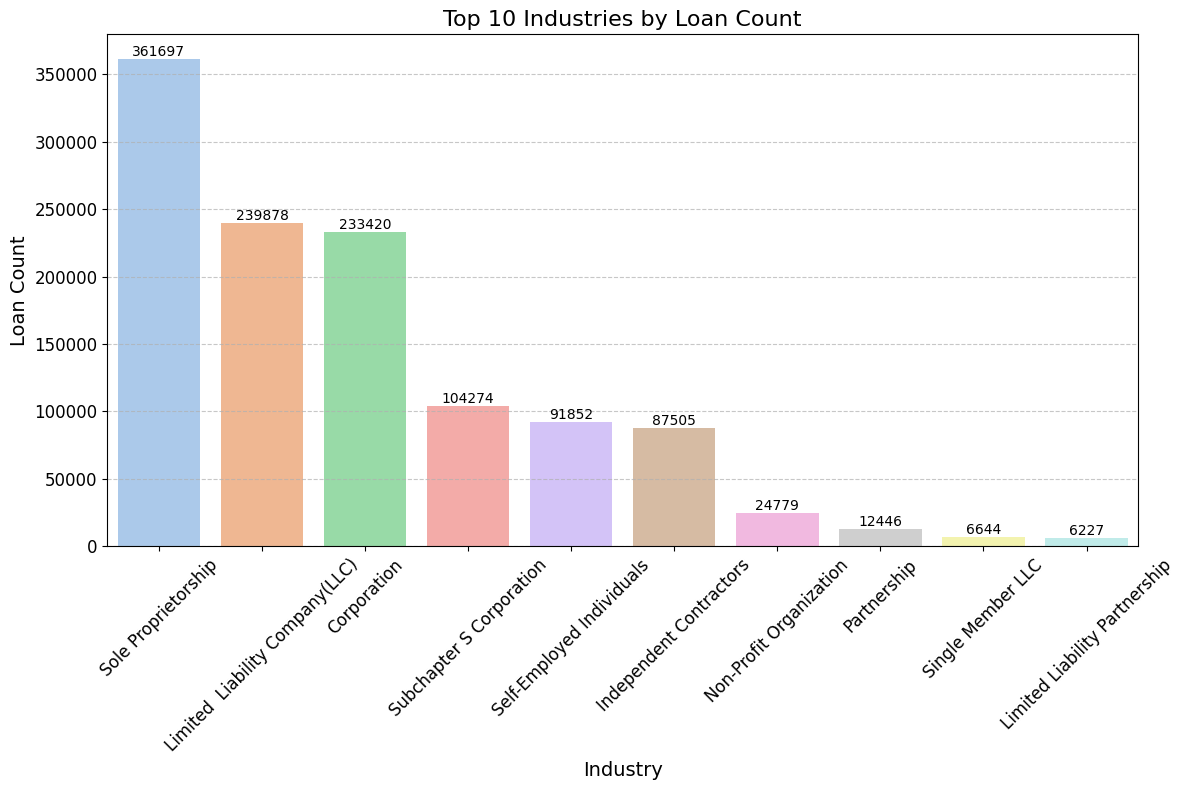

In [ ]:
# Calculate industry distribution
industry_counts = combined_df['BusinessType'].value_counts().head(10)

# Define a color palette
colors = sns.color_palette('pastel', len(industry_counts))

# Plotting
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=industry_counts.index, y=industry_counts.values, palette=colors)

# Add labels to each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2.,
        height,
        f'{int(height)}',  # Format the number as an integer
        ha='center',
        va='bottom'
    )

# Customize the plot
plt.title('Top 10 Industries by Loan Count', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Loan Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


The bar chart titled "Top 10 Industries by Loan Count" displays the top 10 industries with the highest loan amounts. Sole Proprietorship leads with 361,697 loans, followed by Limited Liability Company (LLC) follows with 239,878 loans and so on.

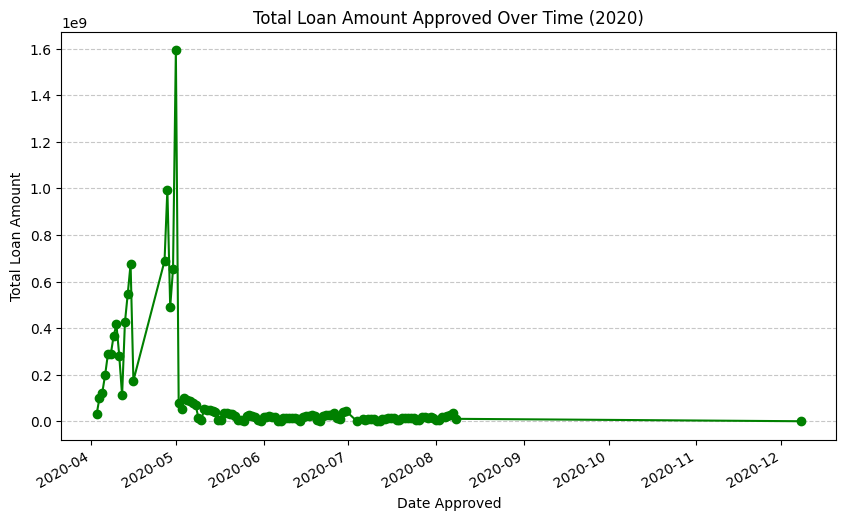

In [ ]:
df['DateApproved'] = pd.to_datetime(df['DateApproved'])

# Filter the data for the year 2020
df_2020 = df[(df['DateApproved'] >= '2020-01-01') & (df['DateApproved'] <= '2020-12-31')]

# Line Plot for total loan amount over time for the year 2020
plt.figure(figsize=(10, 6))
df_2020.groupby('DateApproved')['CurrentApprovalAmount'].sum().plot(kind='line', marker='o', color='green')
plt.title('Total Loan Amount Approved Over Time (2020)')
plt.xlabel('Date Approved')
plt.ylabel('Total Loan Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The line chart titled "Total Loan Amount Approved Over Time (2020)" illustrates the total loan amounts approved on different dates throughout 2020. The x-axis indicates the dates, and the y-axis shows the total loan amounts approved in billions. The chart reveals a surge in loan approvals during the early part of the year (2020-04 - 2020-05), followed by a sharp decrease and a period of stabilization in the loan amounts for the rest of the year.

# Merging the information by geography and time

In [ ]:
# Extract necessary columns from df_population
df_population_filtered = df_population[[ 'STATE', 'POPESTIMATE2020']]

# Extract necessary columns from combined_df
combined_df_filtered = combined_df[['DateApproved', 'BorrowerState']]


fips_to_states = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA',
    8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC',
    12: 'FL', 13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL',
    18: 'IN', 19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA',
    23: 'ME', 24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN',
    28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV',
    33: 'NH', 34: 'NJ', 35: 'NM', 36: 'NY',
    37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR',
    42: 'PA', 44: 'RI', 45: 'SC', 46: 'SD',
    47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA',
    53: 'WA', 54: 'WV', 55: 'WI', 56: 'WY'
}

df_population_filtered['STATE'] = df_job["statefips"].map(fips_to_states)
# Merge the dataframes based on state and year
merged_data = pd.merge(df_population_filtered, combined_df_filtered, left_on='STATE', right_on='BorrowerState', how='inner')

# Drop the duplicate state column (BorrowerState)
merged_data.drop('BorrowerState', axis=1, inplace=True)

# Print the first few rows of the merged dataframe
print(merged_data.head())


<ipython-input-26-fa7e937bfb87>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population_filtered['STATE'] = df_job["statefips"].map(fips_to_states)


  STATE  POPESTIMATE2020 DateApproved
0    AL          5031864   2020-04-28
1    AL          5031864   2021-01-22
2    AL          5031864   2020-04-15
3    AL          5031864   2020-04-15
4    AL          5031864   2020-04-09


In [ ]:
# Create the output folder if it doesn't exist
output_folder = 'output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Save the merged data as CSV file in the output folder
#merged_data.to_csv(os.path.join(output_folder, 'merged_data.csv'), index=False)



merged_data.to_csv(os.path.join("/content/CovidRecovery/output", 'merged_data.csv'), index=False)

In [ ]:
# Create the code folder if it doesn't exist
code_folder = 'code'
if not os.path.exists(code_folder):
    os.makedirs(code_folder)

In [ ]:
# Save the code
with open(os.path.join(code_folder, 'merge_data.py'), 'w') as f:
    f.write("""
# Extract necessary columns from df_population
df_population_filtered = df_population[[ 'STATE', 'POPESTIMATE2020']]

# Extract necessary columns from combined_df
combined_df_filtered = combined_df[['DateApproved', 'BorrowerState']]


fips_to_states = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA',
    8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC',
    12: 'FL', 13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL',
    18: 'IN', 19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA',
    23: 'ME', 24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN',
    28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV',
    33: 'NH', 34: 'NJ', 35: 'NM', 36: 'NY',
    37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR',
    42: 'PA', 44: 'RI', 45: 'SC', 46: 'SD',
    47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA',
    53: 'WA', 54: 'WV', 55: 'WI', 56: 'WY'
}

df_population_filtered['STATE'] = df_job["statefips"].map(fips_to_states)
# Merge the dataframes based on state and year
merged_data = pd.merge(df_population_filtered, combined_df_filtered, left_on='STATE', right_on='BorrowerState', how='inner')

# Drop the duplicate state column (BorrowerState)
merged_data.drop('BorrowerState', axis=1, inplace=True)

# Print the first few rows of the merged dataframe
print(merged_data.head())
""")
print("Data cleaned and saved successfully.")

Data cleaned and saved successfully.


# Total Loan Amount per 100k residents

In [ ]:
# Total loans only for 2020
df_2020 = combined_df[combined_df['DateApproved'].dt.year == 2020]

# Group by state and sum the current approval loan amount
state_loan_amount_2020 = df_2020.groupby('BorrowerState')['CurrentApprovalAmount'].sum().reset_index()

# Rename columns for clarity
state_loan_amount_2020.columns = ['State', 'CurrentApprovalAmount']

print(state_loan_amount_2020.head())

  State  CurrentApprovalAmount
0    AK           1.437167e+08
1    AL           6.163615e+08
2    AR           3.415746e+08
3    AS           7.396822e+05
4    AZ           8.933819e+08


In [ ]:
# Filter rows where SUMLEV is 40 (summary level for the entire state)
state_population_2020 = df_population[df_population['SUMLEV'] == 40]

#  Select relevant columns (STNAME and POPESTIMATE2020)
state_population_2020 = state_population_2020[['STNAME', 'POPESTIMATE2020']]

# Optionally, reset the index
state_population_2020.reset_index(drop=True, inplace=True)

print(state_population_2020)

                  STNAME  POPESTIMATE2020
0                Alabama          5031864
1                 Alaska           732964
2                Arizona          7186683
3               Arkansas          3014348
4             California         39503200
5               Colorado          5785219
6            Connecticut          3577586
7               Delaware           991862
8   District of Columbia           670839
9                Florida         21591299
10               Georgia         10732390
11                Hawaii          1451181
12                 Idaho          1849339
13              Illinois         12790357
14               Indiana          6789098
15                  Iowa          3190904
16                Kansas          2938124
17              Kentucky          4508155
18             Louisiana          4652022
19                 Maine          1364517
20              Maryland          6173689
21         Massachusetts          6997713
22              Michigan         1

In [ ]:
# Provided data
loan_data = {
    'State': ['AL','AK', 'AR', 'AS', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
    'Loan': [ 6.100997e+08, 1.398670e+08,3.381028e+08, 7.455119e+05, 6.541848e+09, 1.044846e+09, 6.287724e+08, 3.076516e+09, 1.392431e+09, 1.674701e+07, 4.738107e+08, 2.511356e+08, 2.121508e+09, 9.681741e+08, 4.628952e+08, 5.145906e+08, 6.997696e+08, 1.298704e+09, 1.002700e+09, 2.149704e+08, 1.526419e+09, 1.097590e+09, 9.265826e+08, 4.616179e+06, 3.225647e+08, 1.792627e+08, 1.161397e+09, 3.094412e+08, 2.458103e+08, 1.692254e+09, 2.174289e+08, 4.026933e+08, 3.762028e+09, 1.810016e+09, 5.411424e+08, 6.521757e+08,3.112684e+09, 2.112684e+09, 1.766201e+08, 1.826556e+08, 1.648522e+08, 8.800598e+08, 4.738884e+09, 7.074302e+08, 1.115391e+09, 6.114725e+06, 9.073830e+08, 7.258356e+08, 1.018273e+08, 6.762137e+07]
}

population_data = {
    'STNAME': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
    'POPESTIMATE2020': [ 5050380,734923,  7272487, 3028443, 39145060, 5811596, 3603691, 1004881, 21830708, 10790385, 1446745, 1904537, 12690341, 6813798, 3197944, 2937946, 4507600, 4627047, 1378787, 6175045, 6991951, 10038117, 5717968, 2949582, 6170393, 1106366, 1964253, 3146632, 1387494, 9269175, 2116950, 19854526, 10567100, 777982, 11765227, 3991634, 4256465, 13013614, 1097092, 5193848, 896299, 6963709, 29561286, 3339284, 647093, 8657348, 7741433, 1785249, 5879978, 579548]
}

In [ ]:
loan_df = pd.DataFrame(loan_data)
population_df = pd.DataFrame(population_data)
loan_data['Loan'] = pd.to_numeric(loan_data['Loan'], errors='coerce')
population_data['POPESTIMATE2020']=pd.to_numeric(population_data['POPESTIMATE2020'],errors="coerce")
Loan_per_100k = loan_data['Loan'] / (population_data['POPESTIMATE2020'] / 100000)
Loan_per_100k

array([1.20802732e+07, 1.90315176e+07, 4.64906709e+06, 2.46170029e+04,
       1.67118099e+07, 1.79786413e+07, 1.74480109e+07, 3.06157246e+08,
       6.37831352e+06, 1.55203081e+05, 3.27501184e+07, 1.31861760e+07,
       1.67175019e+07, 1.42090226e+07, 1.44747750e+07, 1.75153185e+07,
       1.55242169e+07, 2.80676639e+07, 7.27233431e+07, 3.48127665e+06,
       2.18310883e+07, 1.09342220e+07, 1.62047532e+07, 1.56502820e+05,
       5.22762002e+06, 1.62028388e+07, 5.91266502e+07, 9.83404478e+06,
       1.77161343e+07, 1.82567920e+07, 1.02708567e+07, 2.02821916e+06,
       3.56013287e+07, 2.32655254e+08, 4.59950666e+06, 1.63385646e+07,
       7.31283824e+07, 1.62344142e+07, 1.60989325e+07, 3.51676830e+06,
       1.83925453e+07, 1.26378026e+07, 1.60307099e+07, 2.11850864e+07,
       1.72369505e+08, 7.06304633e+04, 1.17211245e+07, 4.06573873e+07,
       1.73176328e+06, 1.16679499e+07])

In [ ]:
loan_per_100k_array =[1.20802732e+07, 1.90315176e+07, 4.64906709e+06, 2.46170029e+04,
       1.67118099e+07, 1.79786413e+07, 1.74480109e+07, 3.06157246e+08,
       6.37831352e+06, 1.55203081e+05, 3.27501184e+07, 1.31861760e+07,
       1.67175019e+07, 1.42090226e+07, 1.44747750e+07, 1.75153185e+07,
       1.55242169e+07, 2.80676639e+07, 7.27233431e+07, 3.48127665e+06,
       2.18310883e+07, 1.09342220e+07, 1.62047532e+07, 1.56502820e+05,
       5.22762002e+06, 1.62028388e+07, 5.91266502e+07, 9.83404478e+06,
       1.77161343e+07, 1.82567920e+07, 1.02708567e+07, 2.02821916e+06,
       3.56013287e+07, 2.32655254e+08, 4.59950666e+06, 1.63385646e+07,
       7.31283824e+07, 1.62344142e+07, 1.60989325e+07, 3.51676830e+06,
       1.83925453e+07, 1.26378026e+07, 1.60307099e+07, 2.11850864e+07,
       1.72369505e+08, 7.06304633e+04, 1.17211245e+07, 4.06573873e+07,
       1.73176328e+06, 1.16679499e+07]
population_data['STNAME']
# Create a DataFrame
data = {"Loan_per_100k": loan_per_100k_array, "STNAME": population_data['STNAME']}
df = pd.DataFrame(data)

print(df)

    Loan_per_100k          STNAME
0    1.208027e+07         Alabama
1    1.903152e+07          Alaska
2    4.649067e+06         Arizona
3    2.461700e+04        Arkansas
4    1.671181e+07      California
5    1.797864e+07        Colorado
6    1.744801e+07     Connecticut
7    3.061572e+08        Delaware
8    6.378314e+06         Florida
9    1.552031e+05         Georgia
10   3.275012e+07          Hawaii
11   1.318618e+07           Idaho
12   1.671750e+07        Illinois
13   1.420902e+07         Indiana
14   1.447478e+07            Iowa
15   1.751532e+07          Kansas
16   1.552422e+07        Kentucky
17   2.806766e+07       Louisiana
18   7.272334e+07           Maine
19   3.481277e+06        Maryland
20   2.183109e+07   Massachusetts
21   1.093422e+07        Michigan
22   1.620475e+07       Minnesota
23   1.565028e+05     Mississippi
24   5.227620e+06        Missouri
25   1.620284e+07         Montana
26   5.912665e+07        Nebraska
27   9.834045e+06          Nevada
28   1.771613e

In [ ]:
# Save to CSV
csv_file_path = os.path.join('CovidRecovery', 'loan_amount_per_100k_residents.csv')
df.to_csv(csv_file_path, index=False)

print("Current working directory:", os.getcwd())
print("CSV file created successfully at:", csv_file_path)

Current working directory: /content
CSV file created successfully at: CovidRecovery/loan_amount_per_100k_residents.csv



GeoDataFrame after merge (with NaN values check):
        NAME  Loan_per_100k
0  LOUISIANA   2.806766e+07
1     ALASKA   1.903152e+07
2   MARYLAND   3.481277e+06
3  WISCONSIN   1.731763e+06
4    FLORIDA   6.378314e+06
5    GEORGIA   1.552031e+05
6  TENNESSEE   1.263780e+07
7  MINNESOTA   1.620475e+07
8       IOWA   1.447478e+07
9   MISSOURI   5.227620e+06
NAME             0
Loan_per_100k    2
dtype: int64


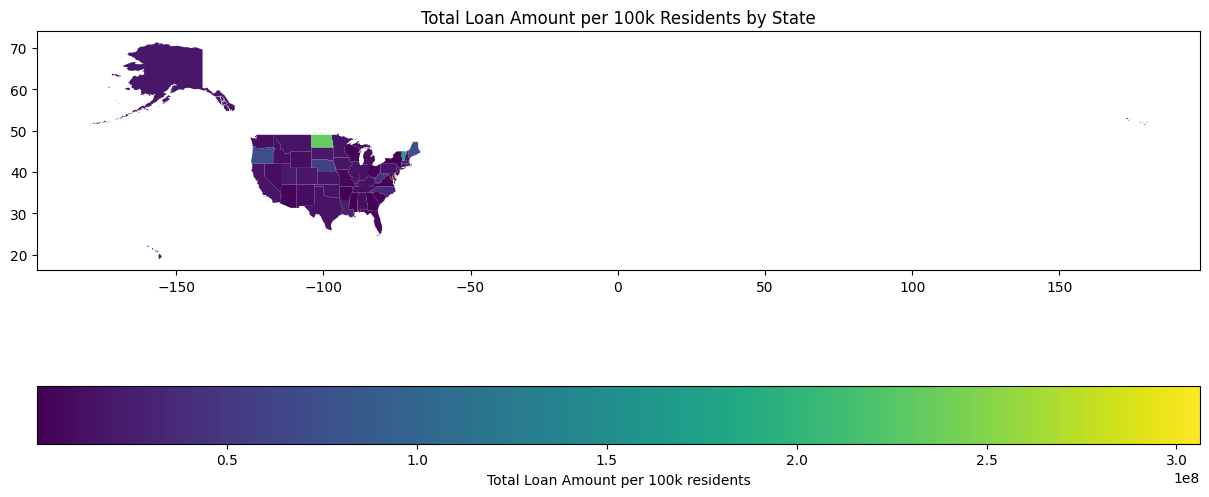

In [ ]:

import geopandas as gpd
import matplotlib.pyplot as plt

# Provided data
loan_data = {
    'Loan_per_100k': [1.20802732e+07, 1.90315176e+07, 4.64906709e+06, 2.46170029e+04,
                      1.67118099e+07, 1.79786413e+07, 1.74480109e+07, 3.06157246e+08,
                      6.37831352e+06, 1.55203081e+05, 3.27501184e+07, 1.31861760e+07,
                      1.67175019e+07, 1.42090226e+07, 1.44747750e+07, 1.75153185e+07,
                      1.55242169e+07, 2.80676639e+07, 7.27233431e+07, 3.48127665e+06,
                      2.18310883e+07, 1.09342220e+07, 1.62047532e+07, 1.56502820e+05,
                      5.22762002e+06, 1.62028388e+07, 5.91266502e+07, 9.83404478e+06,
                      1.77161343e+07, 1.82567920e+07, 1.02708567e+07, 2.02821916e+06,
                      3.56013287e+07, 2.32655254e+08, 4.59950666e+06, 1.63385646e+07,
                      7.31283824e+07, 1.62344142e+07, 1.60989325e+07, 3.51676830e+06,
                      1.83925453e+07, 1.26378026e+07, 1.60307099e+07, 2.11850864e+07,
                      1.72369505e+08, 7.06304633e+04, 1.17211245e+07, 4.06573873e+07,
                      1.73176328e+06, 1.16679499e+07],
    'STNAME': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
               'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
               'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
               'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
               'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
               'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
               'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
               'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
               'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
               'West Virginia', 'Wisconsin', 'Wyoming']
}

df = pd.DataFrame(loan_data)

# Convert state names to uppercase for matching
df['STNAME'] = df['STNAME'].str.upper()

# Load a detailed shapefile of US states
gdf = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip')

# Convert state names to uppercase for matching
gdf['NAME'] = gdf['NAME'].str.upper()

# Merge the data with the GeoDataFrame
merged_gdf = gdf.merge(df, left_on='NAME', right_on='STNAME', how='left')

# Check for NaN values or any issues
print("\nGeoDataFrame after merge (with NaN values check):")
print(merged_gdf[['NAME', 'Loan_per_100k']].head(10))
print(merged_gdf[['NAME', 'Loan_per_100k']].isna().sum())

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='Loan_per_100k', ax=ax, legend=True,
                legend_kwds={'label': "Total Loan Amount per 100k residents",
                             'orientation': "horizontal"})
plt.title('Total Loan Amount per 100k Residents by State')
plt.show()

The visualization titled "Loan Amount Distribution per 100k Residents by State" illustrates how loan amounts per capita vary across the United States. Using a color gradient, the map showcases these variations, with darker shades representing lower loan amounts and brighter shades indicating higher amounts.

The color spectrum ranges from purple to green, with darker shades of purple denoting regions with relatively lower loan amounts per 100,000 residents, while brighter shades of green highlight areas with higher loan amounts.

By presenting this information visually, the map enables viewers to discern patterns in loan distribution, pinpointing areas where loan amounts per capita are notably significant.